## Table of contents
- <a href='#0'>Introduction</a>
- <a href='#1'>1. Importing libraries</a>
- <a href='#2'>2. Attribute information</a>
- <a href='#3'>3. Data exploration</a>
    - <a href='#3.1'>3.1. Data overview</a>
    - <a href='#3.2'>3.2. Qualitative features exploration</a>
    - <a href='#3.3'>3.3. Quantitative features exploration</a>
    - <a href='#3.4'>3.4. Target exploration</a>
    - <a href='#3.5'>3.5. Sex exploration</a>
- <a href='#4'>4. Statistical exploration</a>
    - <a href='#4.1'>4.1. Statistical exploration of qualitative features</a>
        - <a href='#4.1.1'>4.1.1. Functions</a>
        - <a href='#4.1.2'>4.1.2. Tests</a>
    - <a href='#4.2'>4.2. Statistical exploration of quantitative features</a>
- <a href='#5'>5. Data preparation</a>
    - <a href='#5.1'>5.1. Long-tail distribution correction</a>
    - <a href='#5.2'>5.2. Transformation qualitative features</a>
    - <a href='#5.3'>5.3. Dropping noisy features and dummy variable encoding</a>
- <a href='#6'>6. Model selection and explanation</a>
    - <a href='#6.1'>6.1. Train - test splitting</a>
    - <a href='#6.2'>6.2. Decision Tree Classifier</a>
    - <a href='#6.3'>6.3. Random Forest Classifier</a>
    - <a href='#6.4'>6.4. Nearest Neighbors</a>
    - <a href='#6.5'>6.5. Logistic Regression</a>
- <a href='#7'>7. Conclusion</a>   

## <a id='0'>Introduction</a> 


<img src='https://i.redd.it/jnhpmbz0u2f11.jpg' width="500" height="500" title="mad professor" alt="mad">



Today we will explore Heart Disease UCI data set. Why it's interesting and important, and how ML can help doctors and surgeons? Answer is really simple:
<ol>
    <li>rapid diagnosis;</li>
    <li>fast service;</li>
    <li>less mistakes.</li>
</ol>
Is it good goal? Yes!!! And let's do some good analysis!

## <a id='1'>1. Importing libraries</a> 

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import itertools
import scipy.stats
from scipy import stats
import math as mth

## <a id='2'>2. Attribute information</a> 
<ol>
 <li> <b>age</b> - person's age in years; </li>
 <li> <b>sex</b> - person's sex (1 = male, 0 = female); </li>
 <li> <b>cp</b> - chest pain type (4 values);</li> 
 <li> <b>trestbps</b> - resting blood pressure; </li>
 <li> <b>chol</b> - serum cholestoral in mg/dl; </li>
 <li> <b>fbs</b> - fasting blood sugar > 120 mg/dl;</li>
 <li> <b>restecg</b> -  resting electrocardiographic results (values 0,1,2);</li>
 <li> <b>thalach</b> - maximum heart rate achieved; </li>
 <li> <b>exang</b> - exercise induced angina; </li>
 <li> <b>oldpeak</b> - ST depression induced by exercise relative to rest;</li> 
 <li> <b>slope</b> - the slope of the peak exercise ST segment;</li>
 <li> <b>ca</b> -  number of major vessels (0-3) colored by flourosopy;</li> 
 <li> <b>thal</b> - thal:</li>
     <ol>
     <li>3 = normal;</li> 
     <li>6 = fixed defect;</li> 
     <li>7 = reversable defect.</li>
     </ol>
</ol>

## <a id='3'>3. Data exploration</a> 

### <a id='3.1'>3.1. Data overview</a> 

In [126]:
heart_disease_df = pd.read_csv('../input/heart.csv', sep = ',',error_bad_lines = False)

In [127]:
heart_disease_df.info()
print('Data shape: ', heart_disease_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
Data shape:  (303, 14)


In [128]:
heart_disease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [129]:
heart_disease_df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


### <a id='3.2'>3.2. Qualitative features exploration</a> 

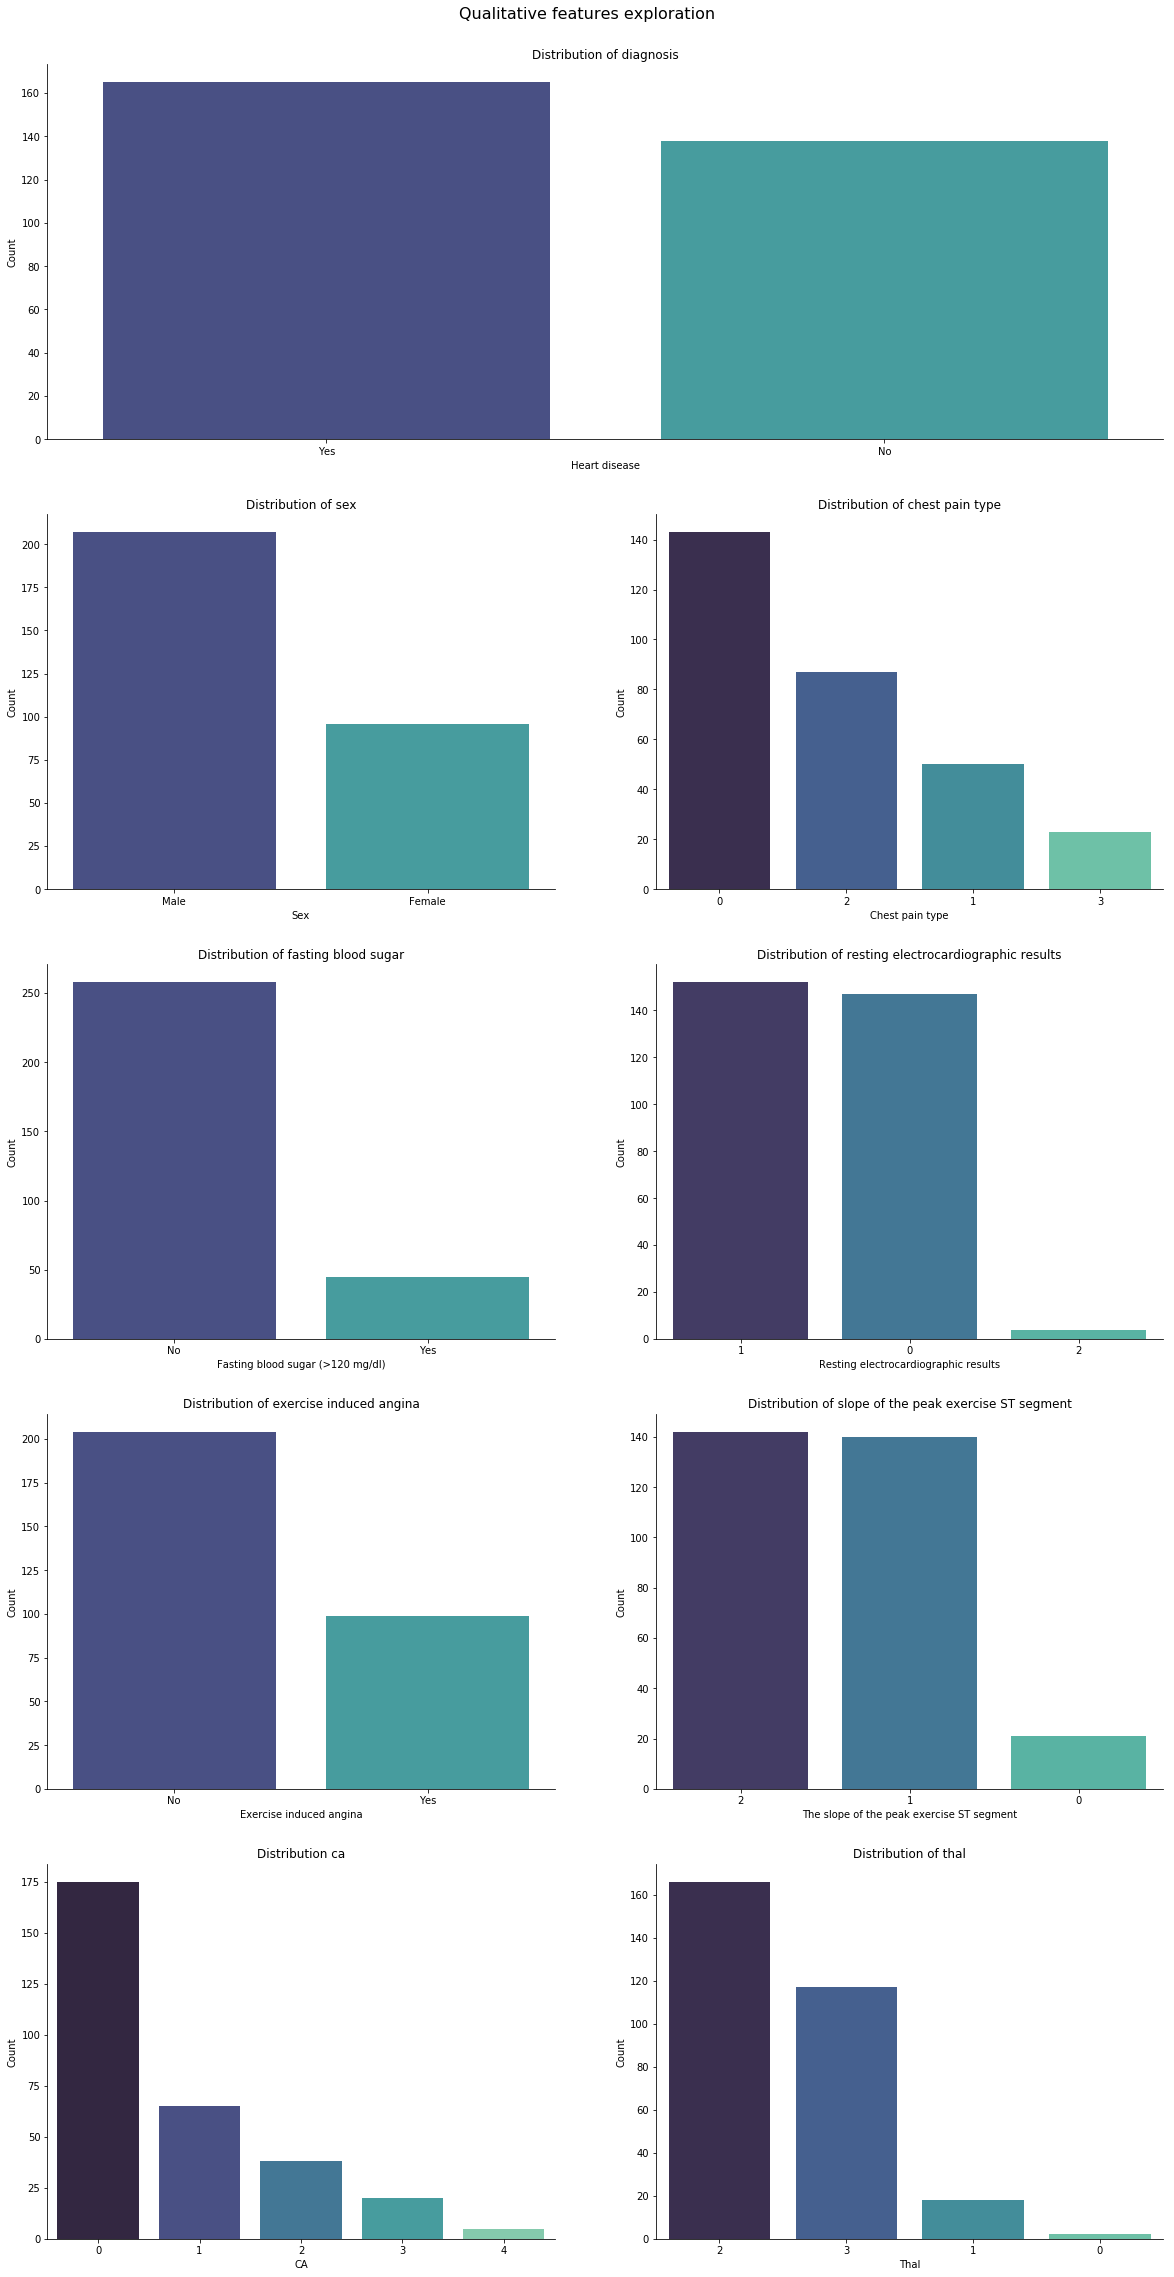

In [130]:
plt.figure(figsize = (20, 40))
plt.suptitle('Qualitative features exploration', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, :])
ax = sns.countplot(heart_disease_df['target'].replace({1 : 'Yes', 0 : 'No'}), palette = 'mako', order = ['Yes', 'No'])
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.title('Distribution of diagnosis')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 0])
ax = sns.countplot(heart_disease_df['sex'].replace({1: 'Male', 0: 'Female'}), palette = 'mako')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 1])
ax = sns.countplot(heart_disease_df.cp, palette = 'mako', order = [0, 2, 1, 3])
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.title('Distribution of chest pain type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 0])
ax = sns.countplot(heart_disease_df['fbs'].replace({1 : 'Yes', 0 : 'No'}), palette = 'mako', order = ('No', 'Yes'))
plt.xlabel('Fasting blood sugar (>120 mg/dl)')
plt.ylabel('Count')
plt.title('Distribution of fasting blood sugar')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 1])
ax = sns.countplot(heart_disease_df['restecg'], palette = 'mako', order = [1, 0, 2])
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Count')
plt.title('Distribution of resting electrocardiographic results')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[3, 0])
ax = sns.countplot(heart_disease_df['exang'].replace({1: 'Yes', 0: 'No'}), palette = 'mako')
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.title('Distribution of exercise induced angina')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[3, 1])
ax = sns.countplot(heart_disease_df['slope'], palette = 'mako', order = [2, 1, 0])
plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.title('Distribution of slope of the peak exercise ST segment')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[4, 0])
ax = sns.countplot(heart_disease_df['ca'], palette = 'mako')
plt.xlabel('CA')
plt.ylabel('Count')
plt.title('Distribution ca')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[4, 1])
ax = sns.countplot(heart_disease_df['thal'], palette = 'mako', order = [2, 3, 1, 0])
plt.xlabel('Thal')
plt.ylabel('Count')
plt.title('Distribution of thal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### <a id='3.3'>3.3. Quantitative features exploration</a> 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


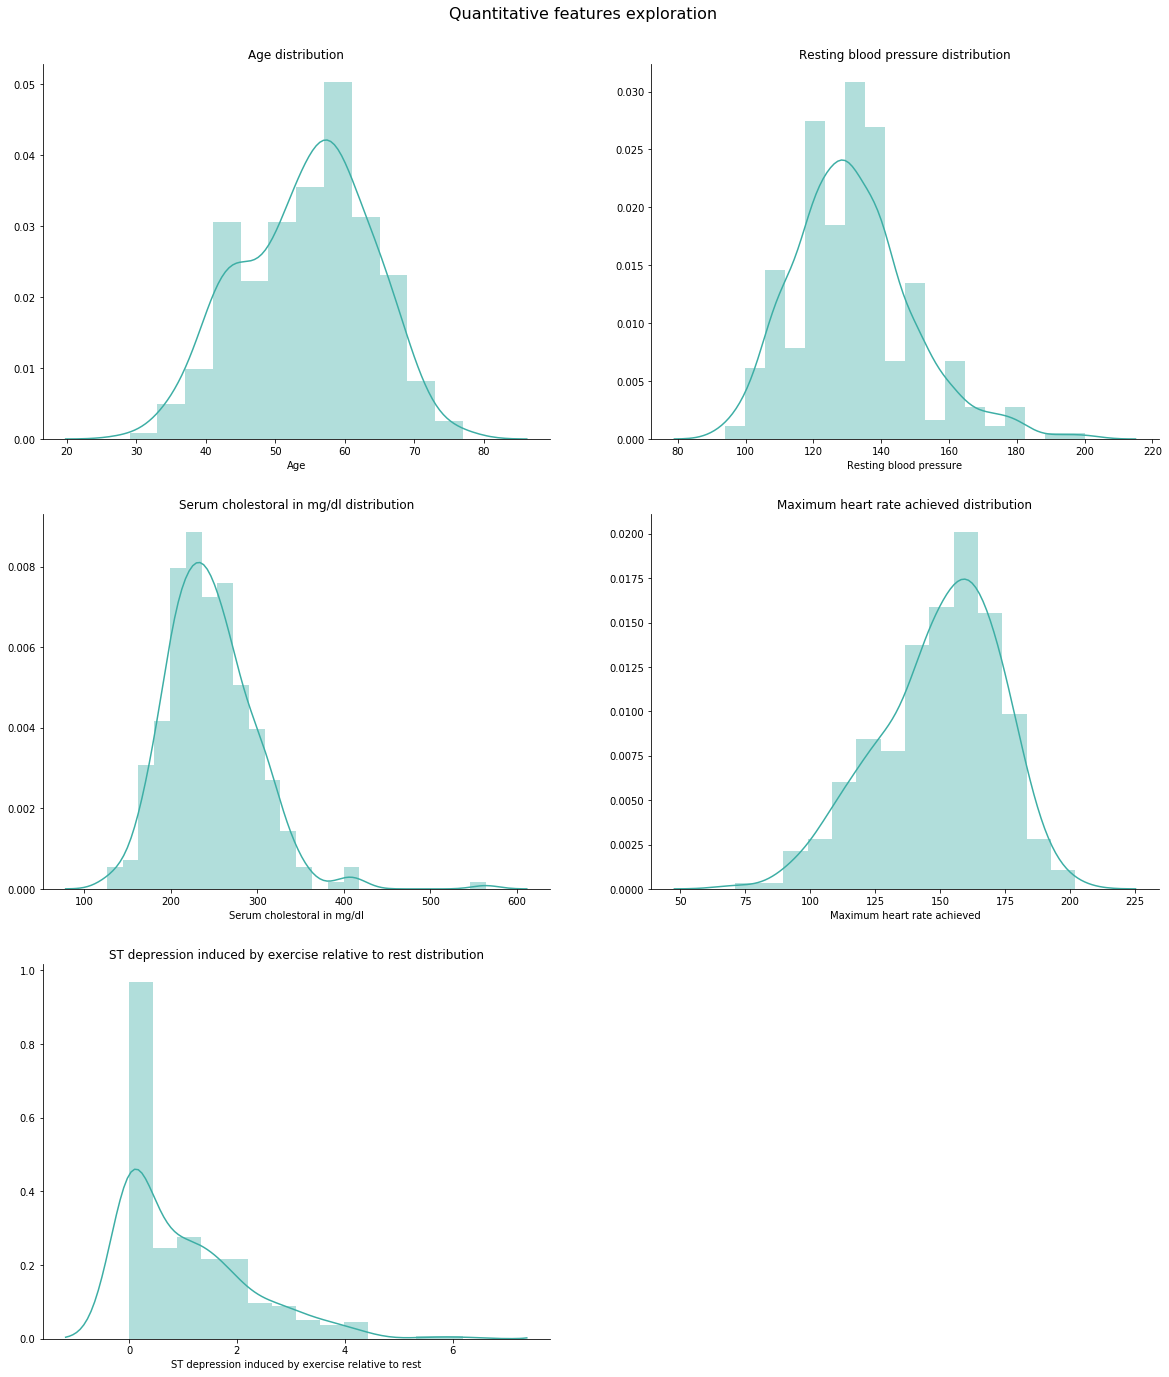

In [131]:
plt.figure(figsize = (20, 40))
plt.suptitle('Quantitative features exploration', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, 0])
ax = sns.distplot(heart_disease_df['age'], color = '#3daea5')
plt.xlabel('Age')
plt.title('Age distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[0, 1])
ax = sns.distplot(heart_disease_df['trestbps'], color = '#3daea5')
plt.xlabel('Resting blood pressure')
plt.title('Resting blood pressure distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 0])
ax = sns.distplot(heart_disease_df['chol'], color = '#3daea5')
plt.xlabel('Serum cholestoral in mg/dl')
plt.title('Serum cholestoral in mg/dl distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 1])
ax = sns.distplot(heart_disease_df['thalach'], color = '#3daea5')
plt.xlabel('Maximum heart rate achieved')
plt.title('Maximum heart rate achieved distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 0])
ax = sns.distplot(heart_disease_df['oldpeak'], color = '#3daea5')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.title('ST depression induced by exercise relative to rest distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

<font size = '3'>
As we can see, some features has long-tailed distribution. We will correct them later.
</font>

### <a id='3.4'>3.4. Target exploration</a> 

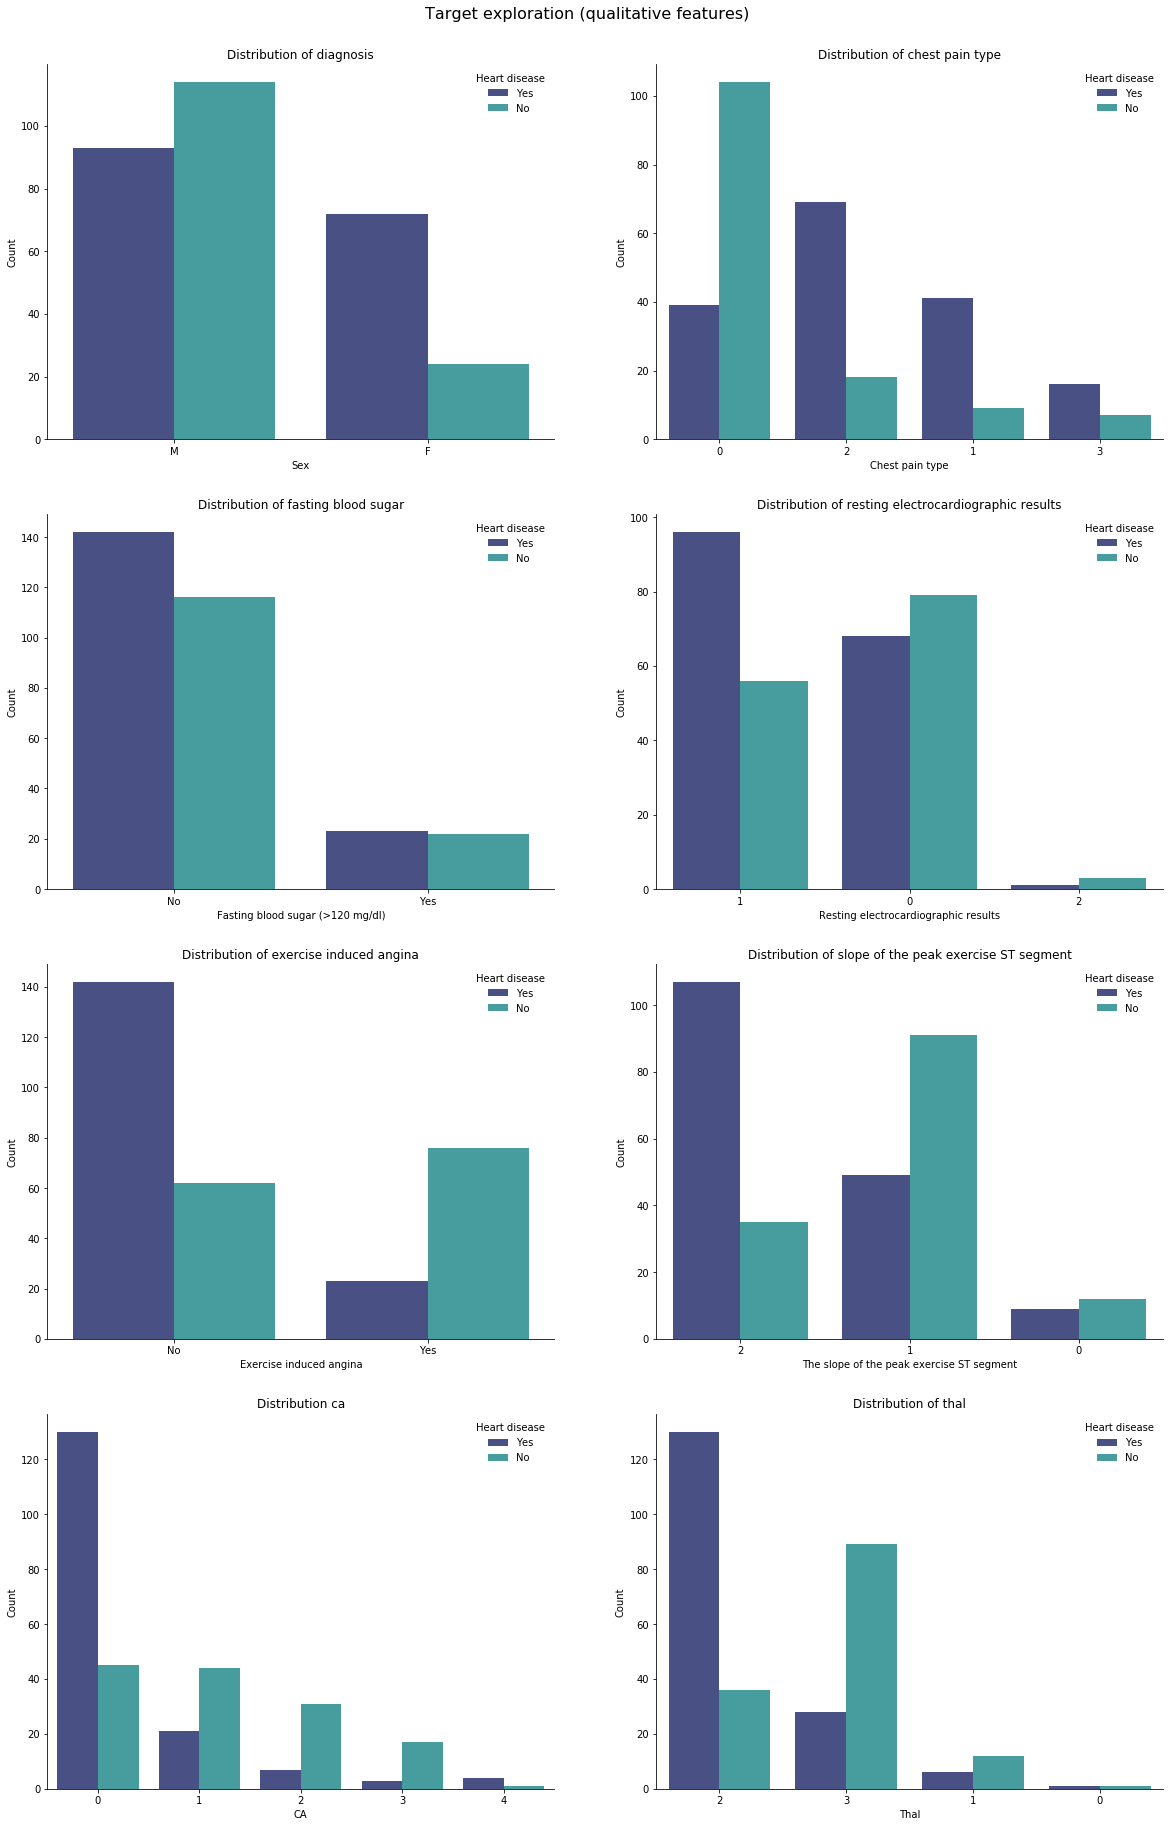

In [132]:
plt.figure(figsize = (20, 40))
plt.suptitle('Target exploration (qualitative features)', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, 0])
ax = sns.countplot(heart_disease_df['sex'].replace({0: 'F', 1: 'M'}), palette = 'mako', hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of diagnosis')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[0, 1])
ax = sns.countplot(heart_disease_df.cp, palette = 'mako', order = [0, 2, 1, 3], hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
plt.title('Distribution of chest pain type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 0])
ax = sns.countplot(heart_disease_df['fbs'].replace({1 : 'Yes', 0 : 'No'}), palette = 'mako', order = ('No', 'Yes'), hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('Fasting blood sugar (>120 mg/dl)')
plt.ylabel('Count')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
plt.title('Distribution of fasting blood sugar')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 1])
ax = sns.countplot(heart_disease_df['restecg'], palette = 'mako', order = [1, 0, 2], hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Count')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
plt.title('Distribution of resting electrocardiographic results')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 0])
ax = sns.countplot(heart_disease_df['exang'].replace({1: 'Yes', 0: 'No'}), palette = 'mako', hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
plt.title('Distribution of exercise induced angina')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 1])
ax = sns.countplot(heart_disease_df['slope'], palette = 'mako', order = [2, 1, 0], hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
plt.title('Distribution of slope of the peak exercise ST segment')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[3, 0])
ax = sns.countplot(heart_disease_df['ca'], palette = 'mako', hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('CA')
plt.ylabel('Count')
plt.title('Distribution ca')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[3, 1])
ax = sns.countplot(heart_disease_df['thal'], palette = 'mako', order = [2, 3, 1, 0], hue = heart_disease_df['target'].replace({0:'No', 1:'Yes'}))
plt.xlabel('Thal')
plt.ylabel('Count')
plt.legend(title = 'Heart disease', loc = 1, frameon = False)
plt.title('Distribution of thal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

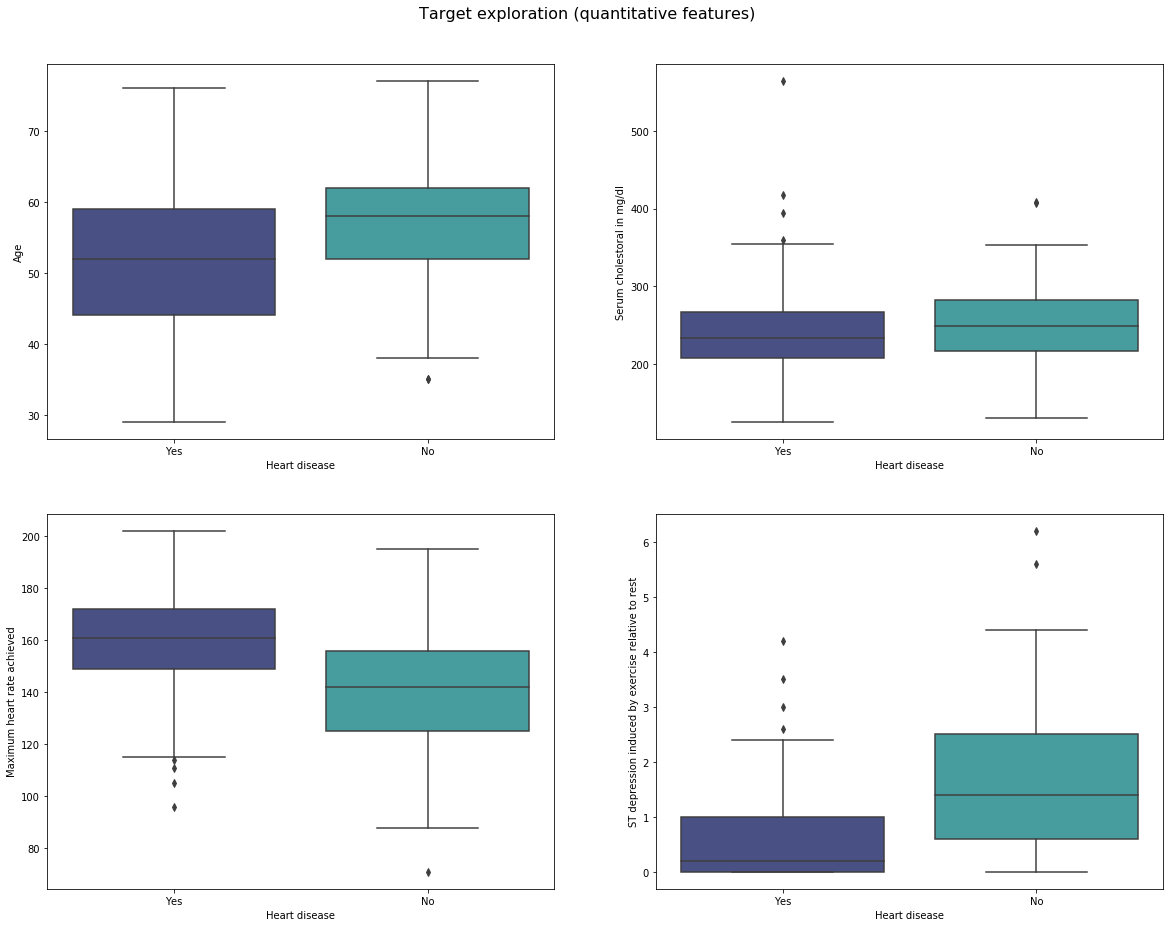

In [133]:
plt.figure(figsize = (20, 40))
plt.suptitle('Target exploration (quantitative features)', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, 0])
sns.boxplot(heart_disease_df['target'].replace({0:'No', 1:'Yes'}), heart_disease_df['age'], palette = 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Age')

plt.subplot(gs[0, 1])
sns.boxplot(heart_disease_df['target'].replace({0:'No', 1:'Yes'}), heart_disease_df['chol'], palette = 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Serum cholestoral in mg/dl')

plt.subplot(gs[1, 0])
sns.boxplot(heart_disease_df['target'].replace({0:'No', 1:'Yes'}), heart_disease_df['thalach'], palette = 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Maximum heart rate achieved')


plt.subplot(gs[1, 1])
sns.boxplot(heart_disease_df['target'].replace({0:'No', 1:'Yes'}), heart_disease_df['oldpeak'], palette = 'mako')
plt.xlabel('Heart disease')
plt.ylabel('ST depression induced by exercise relative to rest')

### <a id='3.5'>3.5. Sex exploration</a> 

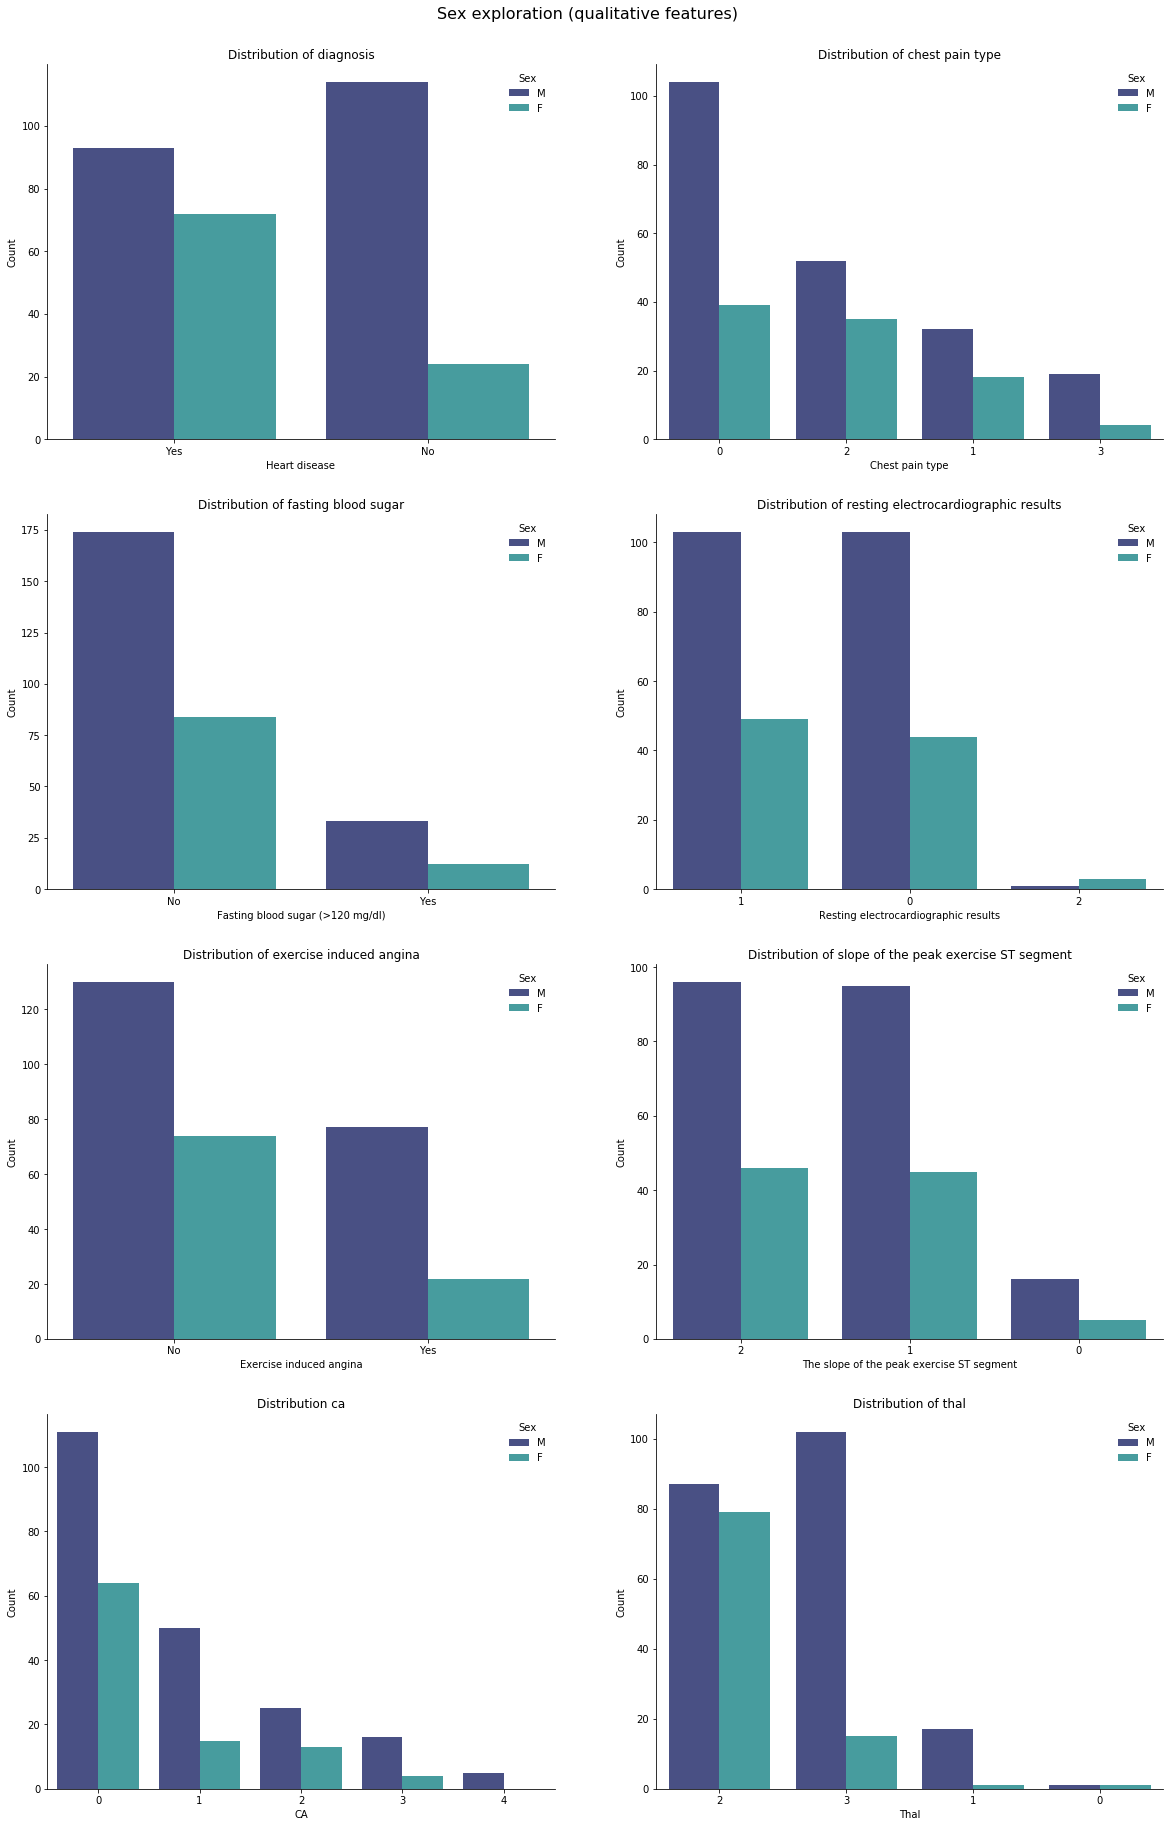

In [134]:
plt.figure(figsize = (20, 40))
plt.suptitle('Sex exploration (qualitative features)', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, 0])
ax = sns.countplot(heart_disease_df['target'].replace({0:'No', 1:'Yes'}), palette = 'mako', hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('Heart disease')
plt.ylabel('Count')
plt.title('Distribution of diagnosis')
plt.legend(title = 'Sex', loc = 1, frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[0, 1])
ax = sns.countplot(heart_disease_df.cp, palette = 'mako', order = [0, 2, 1, 3], hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.legend(title = 'Sex', loc = 1, frameon = False)
plt.title('Distribution of chest pain type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 0])
ax = sns.countplot(heart_disease_df['fbs'].replace({1 : 'Yes', 0 : 'No'}), palette = 'mako', order = ('No', 'Yes'), hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('Fasting blood sugar (>120 mg/dl)')
plt.ylabel('Count')
plt.legend(title = 'Sex', loc = 1, frameon = False)
plt.title('Distribution of fasting blood sugar')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 1])
ax = sns.countplot(heart_disease_df['restecg'], palette = 'mako', order = [1, 0, 2], hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('Resting electrocardiographic results')
plt.ylabel('Count')
plt.legend(title = 'Sex', loc = 1, frameon = False)
plt.title('Distribution of resting electrocardiographic results')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 0])
ax = sns.countplot(heart_disease_df['exang'].replace({1: 'Yes', 0: 'No'}), palette = 'mako', hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')
plt.legend(title = 'Sex', loc = 1, frameon = False)
plt.title('Distribution of exercise induced angina')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[2, 1])
ax = sns.countplot(heart_disease_df['slope'], palette = 'mako', order = [2, 1, 0], hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('The slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.legend(title = 'Sex', loc = 1, frameon = False)
plt.title('Distribution of slope of the peak exercise ST segment')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[3, 0])
ax = sns.countplot(heart_disease_df['ca'], palette = 'mako', hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('CA')
plt.ylabel('Count')
plt.title('Distribution ca')
plt.legend(title = 'Sex', loc = 1, frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[3, 1])
ax = sns.countplot(heart_disease_df['thal'], palette = 'mako', order = [2, 3, 1, 0], hue = heart_disease_df['sex'].replace({0: 'F', 1: 'M'}))
plt.xlabel('Thal')
plt.ylabel('Count')
plt.legend(title = 'Sex', loc = 1, frameon = False)
plt.title('Distribution of thal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

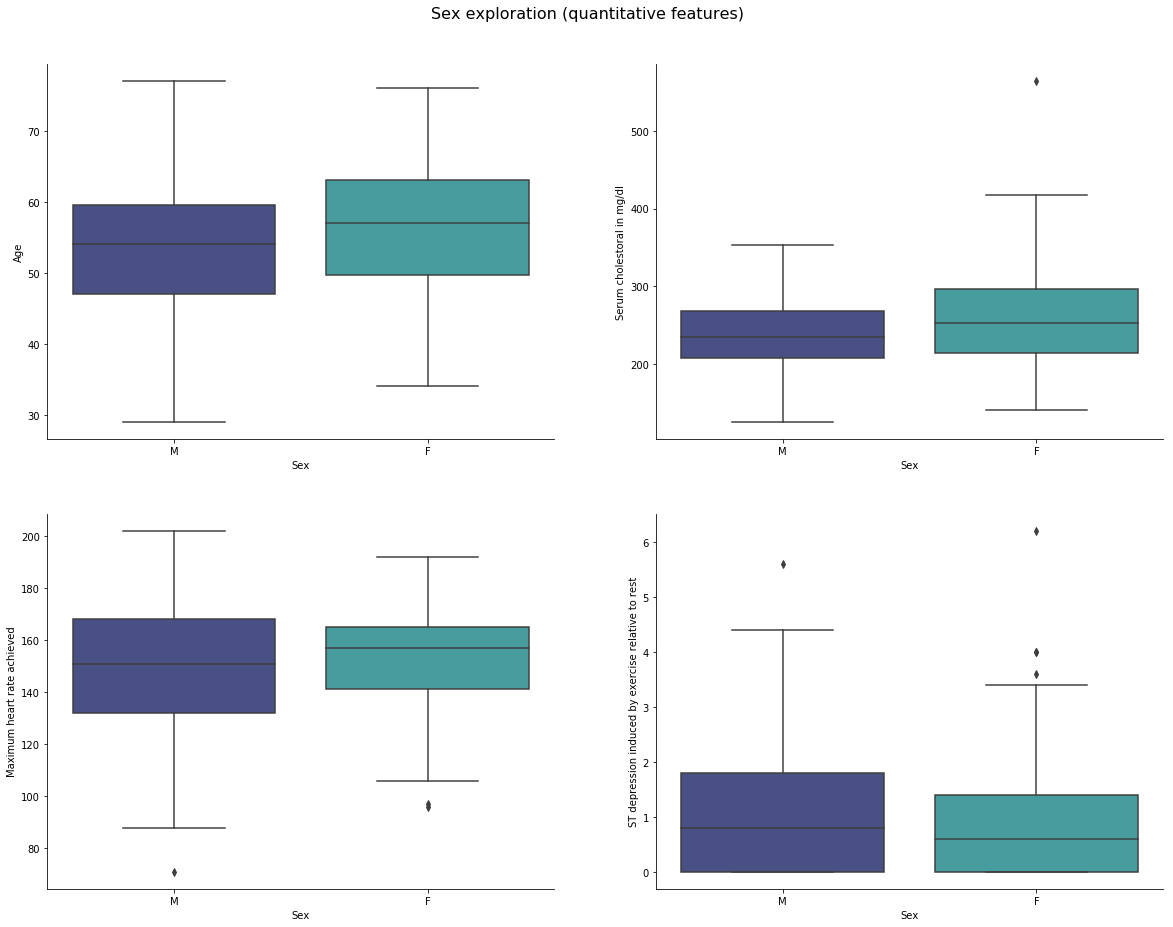

In [135]:
plt.figure(figsize = (20, 40))
plt.suptitle('Sex exploration (quantitative features)', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 2)

plt.subplot(gs[0, 0])
ax = sns.boxplot(heart_disease_df['sex'].replace({0:'F', 1:'M'}), heart_disease_df['age'], palette = 'mako')
plt.xlabel('Sex')
plt.ylabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[0, 1])
ax = sns.boxplot(heart_disease_df['sex'].replace({0:'F', 1:'M'}), heart_disease_df['chol'], palette = 'mako')
plt.xlabel('Sex')
plt.ylabel('Serum cholestoral in mg/dl')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 0])
ax = sns.boxplot(heart_disease_df['sex'].replace({0:'F', 1:'M'}), heart_disease_df['thalach'], palette = 'mako')
plt.xlabel('Sex')
plt.ylabel('Maximum heart rate achieved')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 1])
ax = sns.boxplot(heart_disease_df['sex'].replace({0:'F', 1:'M'}), heart_disease_df['oldpeak'], palette = 'mako')
plt.xlabel('Sex')
plt.ylabel('ST depression induced by exercise relative to rest')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## <a id='4'>4. Statistical exploration</a> 

Statistical tests - what for? They can help as to find influence between features, find out features that have no influence at all. Also statistical tests can help as to explain results

### <a id='4.1'>4.1. Statistical exploration of qualitative features</a> 

#### <a id='4.1.1'>4.1.1. Functions</a> 

In [136]:
def chi2_test(df, features_list, feature_name_2):
    result = []
    for feature in features_list:
        if feature == feature_name_2:
            continue
        else:
            chi_2_test_array = []
            array = np.array(pd.crosstab(df[feature], df[feature_name_2]))
            lenght = array.shape[0]
            for i in range(lenght):
                chi_2_test_array.append(array[i, :])
            chi_2, p_val, dof , ex = stats.chi2_contingency(chi_2_test_array, lambda_="log-likelihood")    
            row = [feature + ' - ' + feature_name_2,'{0:.3f}'.format(chi_2), dof, '{0:.3f}'.format(p_val)]
            result.append(row)
    chi_2_test_df = pd.DataFrame(result, columns = ['Features', 'chi_2', 'dof', 'p_val'])
    chi_2_test_df['p_val'] = chi_2_test_df['p_val'].astype('float64')
    return chi_2_test_df

In [137]:
def color_p_val_red(val):
    if val > 0.01:
         color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

In [138]:
def color_negative_pos_red(val):
    if val < 0:
         color = 'red'
    else:
        color = 'green'
    return 'color: %s' % color

#### <a id='4.1.2'>4.1.2. Tests</a> 

In [139]:
features_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
chi2_test_target_df = chi2_test(heart_disease_df, features_list, 'target')
chi2_test_target_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,chi_2,dof,p_val
0,sex - target,23.557,1,0
1,cp - target,85.941,3,0
2,fbs - target,0.106,1,0.745
3,restecg - target,10.113,2,0.006
4,exang - target,57.731,1,0
5,slope - target,49.076,2,0
6,ca - target,78.111,4,0
7,thal - target,89.575,3,0


In [140]:
chi2_test_sex_df = chi2_test(heart_disease_df, features_list, 'sex')
chi2_test_sex_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,chi_2,dof,p_val
0,cp - sex,6.979,3,0.073
1,fbs - sex,0.380,1,0.538
2,restecg - sex,3.392,2,0.183
3,exang - sex,5.638,1,0.018
4,slope - sex,0.680,2,0.712
5,ca - sex,9.533,4,0.049
6,thal - sex,48.573,3,0
7,target - sex,23.557,1,0


In [141]:
chi2_test_cp_df = chi2_test(heart_disease_df, features_list, 'cp')
chi2_test_cp_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,chi_2,dof,p_val
0,sex - cp,6.979,3,0.073
1,fbs - cp,3.811,3,0.283
2,restecg - cp,10.566,6,0.103
3,exang - cp,71.508,3,0
4,slope - cp,28.008,6,0
5,ca - cp,39.251,12,0
6,thal - cp,43.860,9,0
7,target - cp,85.941,3,0


In [142]:
chi2_test_fbs_df = chi2_test(heart_disease_df, features_list, 'fbs')
chi2_test_fbs_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,chi_2,dof,p_val
0,sex - fbs,0.380,1,0.538
1,cp - fbs,3.811,3,0.283
2,restecg - fbs,2.872,2,0.238
3,exang - fbs,0.075,1,0.784
4,slope - fbs,2.834,2,0.242
5,ca - fbs,6.632,4,0.157
6,thal - fbs,4.608,3,0.203
7,target - fbs,0.106,1,0.745


In [143]:
chi2_test_fbs_df = chi2_test(heart_disease_df, features_list, 'restecg')
chi2_test_fbs_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,chi_2,dof,p_val
0,sex - restecg,3.392,2,0.183
1,cp - restecg,10.566,6,0.103
2,fbs - restecg,2.872,2,0.238
3,exang - restecg,2.954,2,0.228
4,slope - restecg,11.976,4,0.018
5,ca - restecg,9.990,8,0.266
6,thal - restecg,2.514,6,0.867
7,target - restecg,10.113,2,0.006


In [144]:
chi2_test_fbs_df = chi2_test(heart_disease_df, features_list, 'thal')
chi2_test_fbs_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,chi_2,dof,p_val
0,sex - thal,48.573,3,0
1,cp - thal,43.860,9,0
2,fbs - thal,4.608,3,0.203
3,restecg - thal,2.514,6,0.867
4,exang - thal,33.356,3,0
5,slope - thal,36.890,6,0
6,ca - thal,24.675,12,0.016
7,target - thal,89.575,3,0


As we can see, next features has no influence on target variable: sex, fbs.

### <a id='4.2'>4.2. Statistical exploration of quantitative features</a> 

In [145]:
heart_disease_df_0 = heart_disease_df[heart_disease_df['target'] == 0]
heart_disease_df_1 = heart_disease_df[heart_disease_df['target'] == 1]
heart_disease_df_0.drop('target', axis = 1, inplace = True)
heart_disease_df_1.drop('target', axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [146]:
drop_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
heart_disease_df_0.drop(drop_list, axis = 1, inplace = True)
heart_disease_df_1.drop(drop_list, axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [147]:
result = []
for column in heart_disease_df_0.columns:
    ttest, p_val = stats.ttest_ind(heart_disease_df_0[column], heart_disease_df_1[column])
    row = [column, ttest, '{0:.3f}'.format(p_val)]
    result.append(row)
t_test_df = pd.DataFrame(result, columns = ['Features', 'ttest', 'p_val'])
t_test_df['p_val'] = t_test_df['p_val'].astype('float64') 
t_test_df.style.applymap(color_p_val_red,  subset = ['p_val'])

,Features,ttest,p_val
0,age,4.01456,0
1,trestbps,2.54129,0.012
2,chol,1.48425,0.139
3,thalach,-8.0697,0
4,oldpeak,8.27958,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


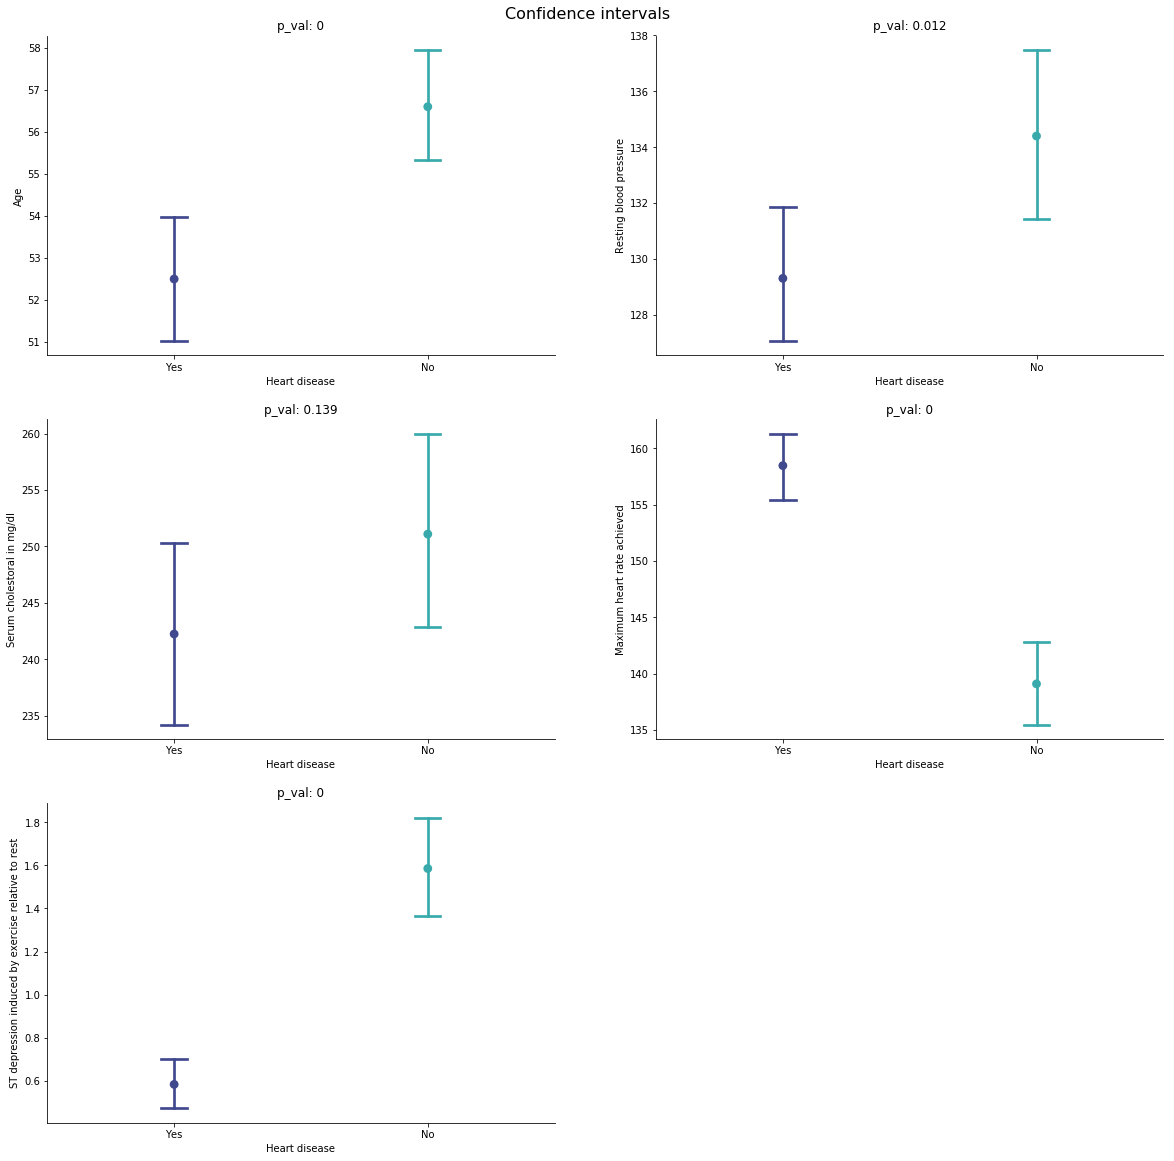

In [148]:
plt.figure(figsize = (20,20))
plt.suptitle('Confidence intervals', y = 0.90, fontsize = 16)

plt.subplot(321)
ax = sns.pointplot(x = heart_disease_df['target'].replace({0:'No', 1:'Yes'}), y = heart_disease_df['age'], join= False, capsize= 0.1, palette= 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Age')
plt.title('p_val: 0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(322)
ax = sns.pointplot(x = heart_disease_df['target'].replace({0:'No', 1:'Yes'}), y = heart_disease_df['trestbps'], join= False, capsize= 0.1, palette= 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Resting blood pressure')
plt.title('p_val: 0.012')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(323)
ax = sns.pointplot(x = heart_disease_df['target'].replace({0:'No', 1:'Yes'}), y = heart_disease_df['chol'], join= False, capsize= 0.1, palette= 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Serum cholestoral in mg/dl')
plt.title('p_val: 0.139')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(324)
ax = sns.pointplot(x = heart_disease_df['target'].replace({0:'No', 1:'Yes'}), y = heart_disease_df['thalach'], join= False, capsize= 0.1, palette= 'mako')
plt.xlabel('Heart disease')
plt.ylabel('Maximum heart rate achieved')
plt.title('p_val: 0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(325)
ax = sns.pointplot(x = heart_disease_df['target'].replace({0:'No', 1:'Yes'}), y = heart_disease_df['oldpeak'], join= False, capsize= 0.1, palette= 'mako')
plt.xlabel('Heart disease')
plt.ylabel('ST depression induced by exercise relative to rest')
plt.title('p_val: 0')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Next features has no influence on target variable: trestbps, chol.

## <a id='5'>5. Data preparation</a> 

### <a id='5.1'>5.1. Correction long tail distribution </a> 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


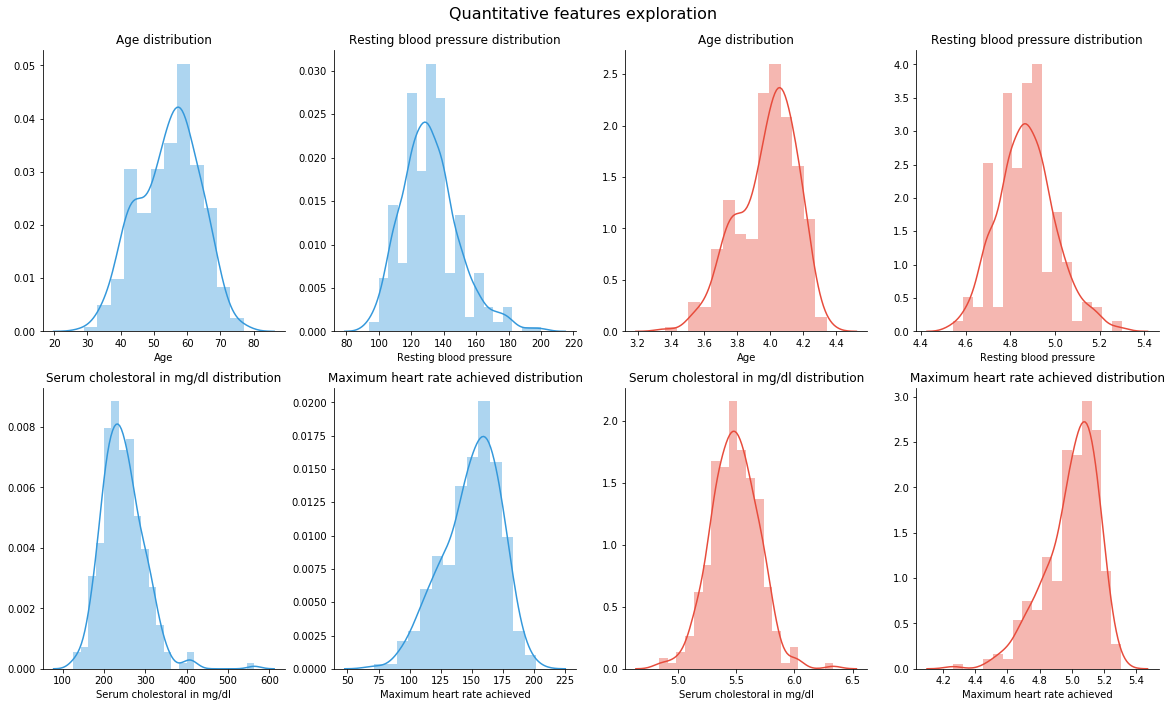

In [149]:
plt.figure(figsize = (20, 30))
plt.suptitle('Quantitative features exploration', y = 0.90, fontsize = 16)
gs = gridspec.GridSpec(5, 4)

plt.subplot(gs[0, 0])
ax = sns.distplot(heart_disease_df['age'], color =  "#3498db")
plt.xlabel('Age')
plt.title('Age distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[0, 1])
ax = sns.distplot(heart_disease_df['trestbps'], color = "#3498db")
plt.xlabel('Resting blood pressure')
plt.title('Resting blood pressure distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 0])
ax = sns.distplot(heart_disease_df['chol'], color = "#3498db")
plt.xlabel('Serum cholestoral in mg/dl')
plt.title('Serum cholestoral in mg/dl distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 1])
ax = sns.distplot(heart_disease_df['thalach'], color = "#3498db")
plt.xlabel('Maximum heart rate achieved')
plt.title('Maximum heart rate achieved distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.subplot(gs[0, 2])
ax = sns.distplot(np.log(heart_disease_df['age']), color =  "#e74c3c")
plt.xlabel('Age')
plt.title('Age distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[0, 3])
ax = sns.distplot(np.log(heart_disease_df['trestbps']), color = "#e74c3c")
plt.xlabel('Resting blood pressure')
plt.title('Resting blood pressure distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 2])
ax = sns.distplot(np.log(heart_disease_df['chol']), color = "#e74c3c")
plt.xlabel('Serum cholestoral in mg/dl')
plt.title('Serum cholestoral in mg/dl distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplot(gs[1, 3])
ax = sns.distplot(np.log(heart_disease_df['thalach']), color = "#e74c3c")
plt.xlabel('Maximum heart rate achieved')
plt.title('Maximum heart rate achieved distribution')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Blue - before, red - after log transform

In [150]:
heart_disease_df['age'] = np.log(heart_disease_df['age'])
heart_disease_df['trestbps'] = np.log(heart_disease_df['trestbps'])
heart_disease_df['chol'] = np.log(heart_disease_df['chol'])
heart_disease_df['thalach'] = np.log(heart_disease_df['thalach'])

### <a id='5.2'>5.2. Transformation qualitative features</a> 

In [151]:
features_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in features_list:
    heart_disease_df[feature] = heart_disease_df[feature].astype('object')    

### <a id='5.3'>5.3. Dropping noisy features and dummy variable encoding</a> 

In [152]:
drop_list = ['sex', 'fbs', 'trestbps', 'chol']
heart_disease_df.drop(drop_list, axis = 1, inplace = True)

In [153]:
heart_disease_df = pd.get_dummies(heart_disease_df, prefix = ['cp_', 'restecg_', 'exang_', 'slope_', 'ca_', 'thal_'])

## <a id='6'>6. Model selection and explanation</a> 

### <a id='6.1'>6.1. Train - test splitting</a> 

In [154]:
X = heart_disease_df.drop('target', axis = 1)
Y = heart_disease_df['target']

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 17)

### <a id='6.2'>6.2. Decision Tree Classifier</a> 

In [156]:
d_tree = DecisionTreeClassifier(max_depth = 10, random_state = 17) 

In [157]:
d_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [158]:
Y_predict = d_tree.predict(X_test)

In [159]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        34
           1       0.67      0.74      0.70        27

   micro avg       0.72      0.72      0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [160]:
data = {'Test_values' : np.array(Y_test),'Predicted_values' : Y_predict}
cm = pd.DataFrame(data, columns = ['Test_values', 'Predicted_values'])

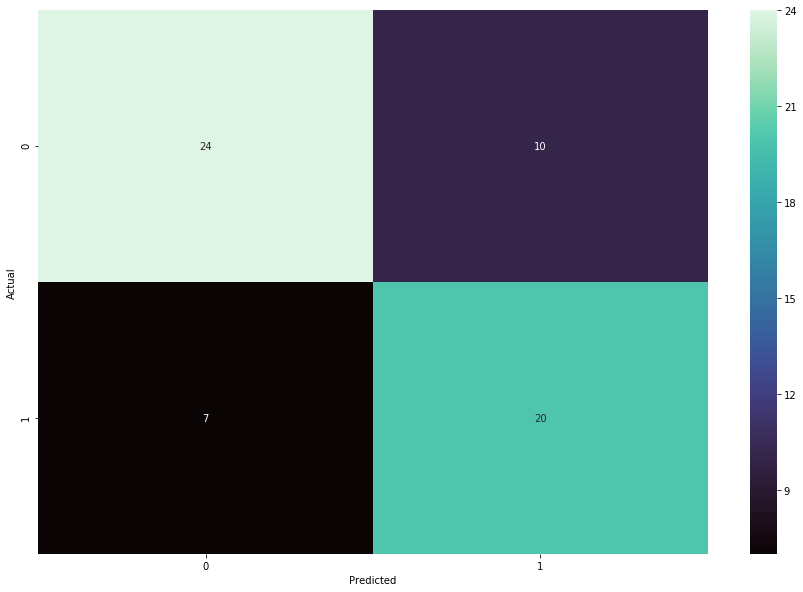

In [161]:
plt.figure(figsize = (15, 10))
sns.heatmap(pd.crosstab(cm['Test_values'], cm['Predicted_values'], rownames=['Actual'], colnames=['Predicted']), annot=True, cmap = 'mako')

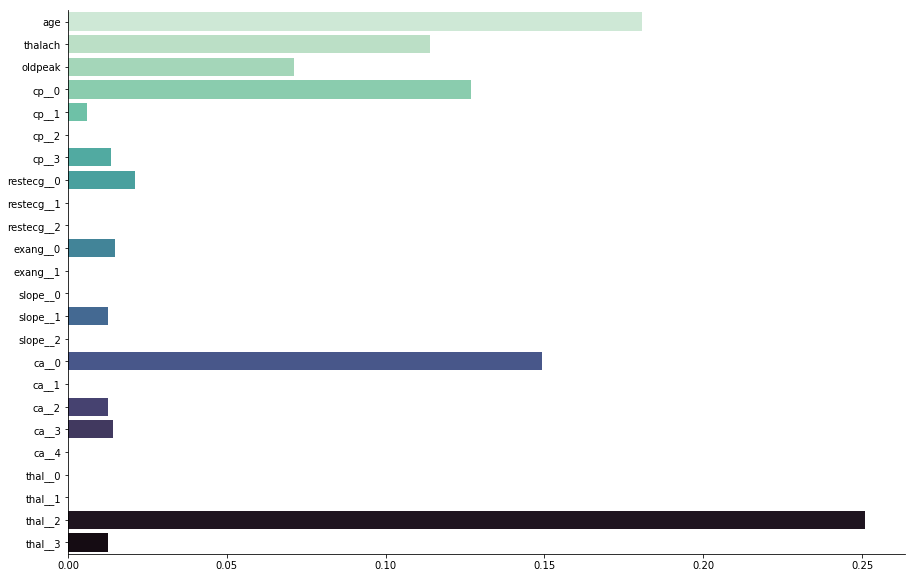

In [162]:
plt.figure(figsize = (15, 10))
ax = sns.barplot(d_tree.feature_importances_, X_test.columns, palette = 'mako_r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### <a id='6.3'>6.3. Random Forest Classifier</a>  

In [163]:
r_forest = RandomForestClassifier(max_depth = 10, min_samples_split = 10, max_features = 5, n_estimators = 1000, n_jobs = -1)

In [164]:
r_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
Y_predict = r_forest.predict(X_test)

In [166]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        34
           1       0.76      0.81      0.79        27

   micro avg       0.80      0.80      0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [167]:
data = {'Test_values' : np.array(Y_test),'Predicted_values' : Y_predict}
cm = pd.DataFrame(data, columns = ['Test_values', 'Predicted_values'])

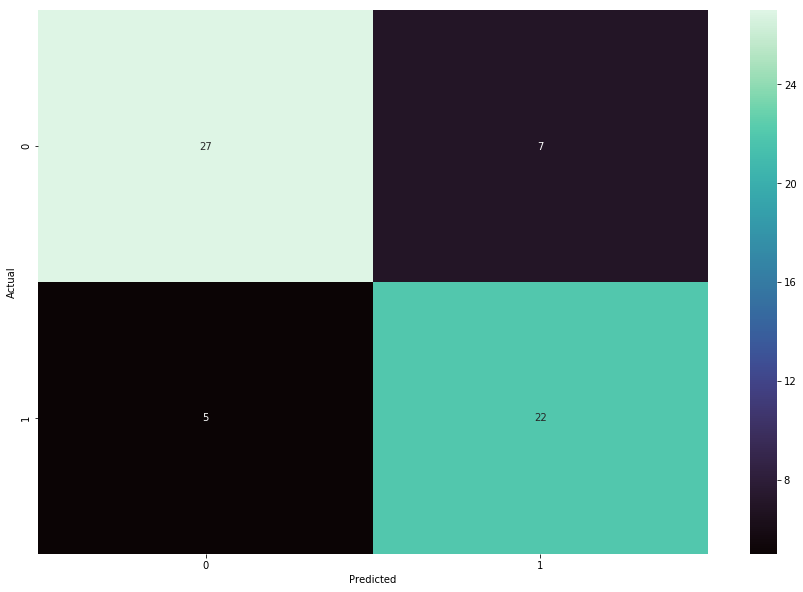

In [168]:
plt.figure(figsize = (15, 10))
sns.heatmap(pd.crosstab(cm['Test_values'], cm['Predicted_values'], rownames=['Actual'], colnames=['Predicted']), annot=True, cmap = 'mako')

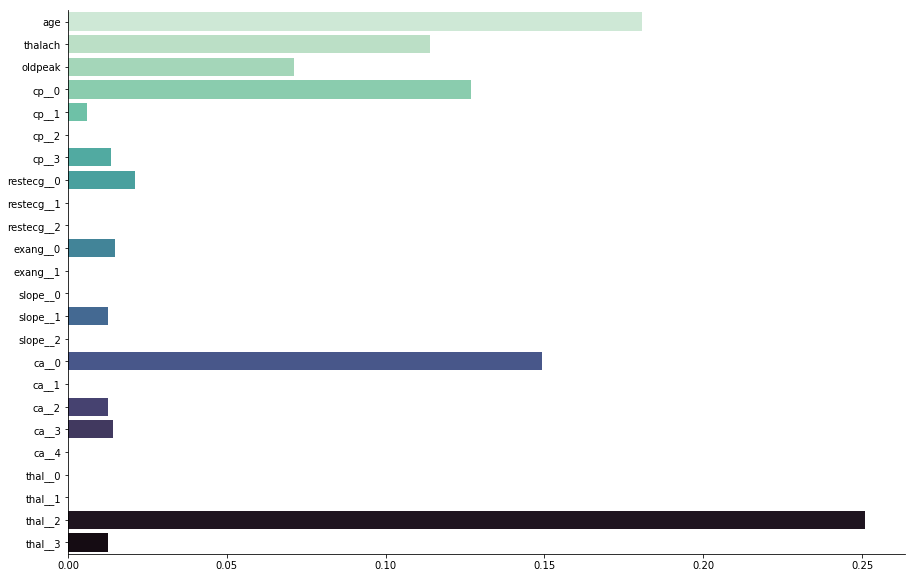

In [169]:
plt.figure(figsize = (15, 10))
ax = sns.barplot(d_tree.feature_importances_, X_test.columns, palette = 'mako_r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### <a id='6.4'>6.4. Nearest Neighbors</a>

In [170]:
knn = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1, weights = 'distance', algorithm = 'brute')

In [171]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='distance')

In [172]:
Y_predict = knn.predict(X_test)

In [173]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        34
           1       0.79      0.81      0.80        27

   micro avg       0.82      0.82      0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [174]:
data = {'Test_values' : np.array(Y_test),'Predicted_values' : Y_predict}
cm = pd.DataFrame(data, columns = ['Test_values', 'Predicted_values'])

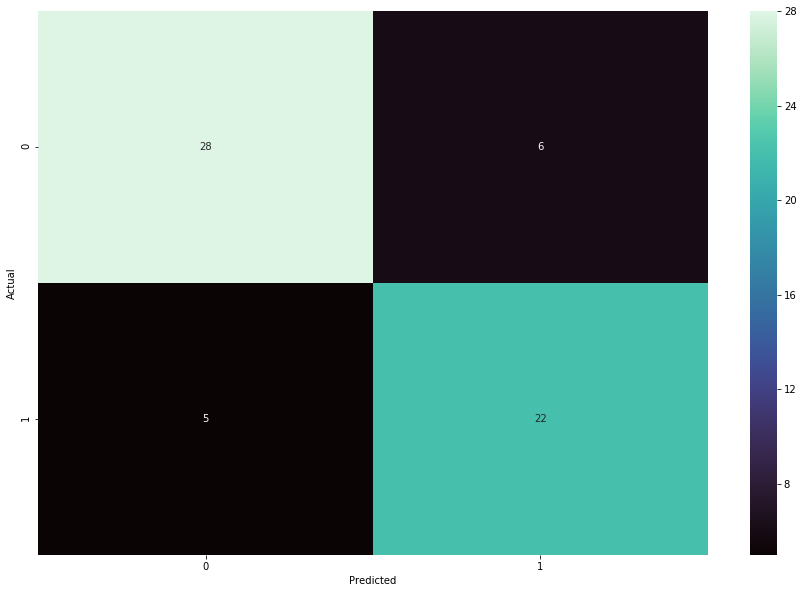

In [175]:
plt.figure(figsize = (15, 10))
sns.heatmap(pd.crosstab(cm['Test_values'], cm['Predicted_values'], rownames=['Actual'], colnames=['Predicted']), annot=True, cmap = 'mako')

### <a id='6.5'>6.5. Logistic Regression</a> 

In [176]:
log_reg = LogisticRegressionCV(cv = 5, max_iter = 500, n_jobs = -1, refit = True, random_state = 17)

In [177]:
log_reg.fit(X_test, Y_test)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=500,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=17,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [178]:
Y_predict = log_reg.predict(X_test)

In [179]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.92      0.89      0.91        27

   micro avg       0.92      0.92      0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [180]:
data = {'Test_values' : np.array(Y_test),'Predicted_values' : Y_predict}
cm = pd.DataFrame(data, columns = ['Test_values', 'Predicted_values'])

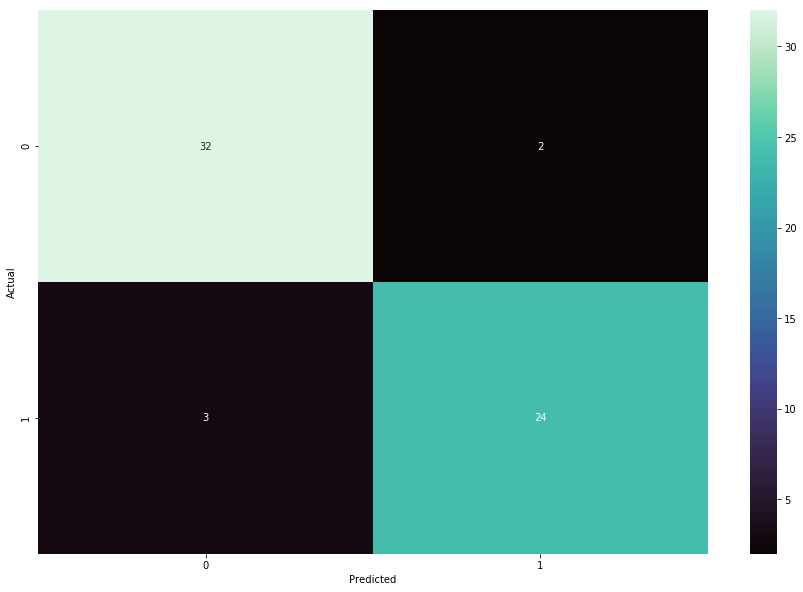

In [181]:
plt.figure(figsize = (15, 10))
sns.heatmap(pd.crosstab(cm['Test_values'], cm['Predicted_values'], rownames=['Actual'], colnames=['Predicted']), annot=True, cmap = 'mako')

In [182]:
features_list = ['age', 'thalach', 'oldpeak', 'cp__0', 'cp__1', 'cp__2', 'cp__3',
       'restecg__0', 'restecg__1', 'restecg__2', 'exang__0', 'exang__1',
       'slope__0', 'slope__1', 'slope__2', 'ca__0', 'ca__1', 'ca__2', 'ca__3',
       'ca__4', 'thal__0', 'thal__1', 'thal__2', 'thal__3']

In [183]:
result = []
i = 0
for feature in features_list:
    row = [feature, log_reg.coef_[0, i]]
    result.append(row)
    i = i + 1

In [184]:
log_reg_coef_df = pd.DataFrame(result, columns = ['feature', 'coef'])

In [185]:
log_reg_coef_df.style.applymap(color_negative_pos_red, subset = ['coef'])

,feature,coef
0,age,0.78053
1,thalach,-5.4605
2,oldpeak,-0.182079
3,cp__0,-2.35857
4,cp__1,-0.0801936
5,cp__2,1.42412
6,cp__3,1.01481
7,restecg__0,-0.487132
8,restecg__1,0.487298
9,restecg__2,0


It's very strange, but restecg__2 and thal__0 are 0. Maybe these features has no influence on target variable.

## <a id='7'>7. Conclusion</a> 

Health care - good field fo ML and data science. Nowaday we can mix traditional diagnostic methods with moder methods of ML and DL. This collaboration can change medicine!